In [ ]:
import pandas as pd
import numpy as np
import os
import math
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
bank=pd.read_csv('bank-full.csv',sep=";")

In [ ]:
bank.head()

In [41]:
print("{rows}".format(rows = len(bank)))



45211


In [42]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [43]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


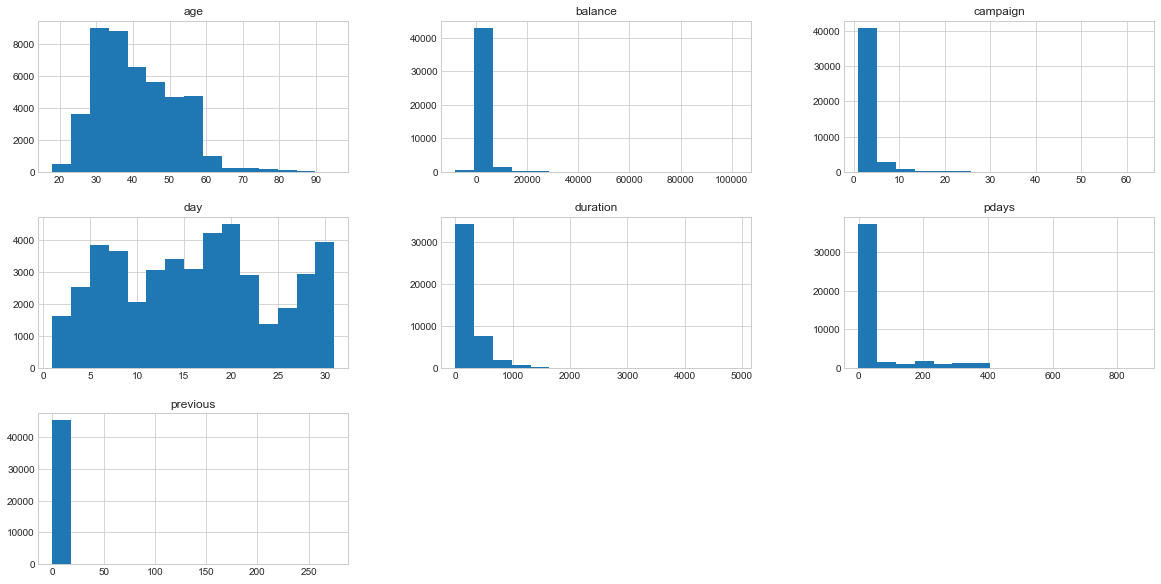

In [44]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

bank.hist(bins=15, figsize=(20,10))
plt.show()

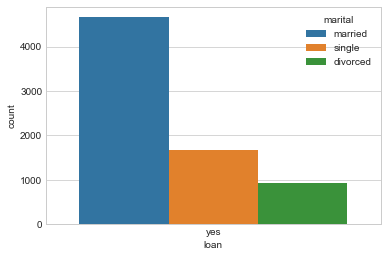

In [45]:
sns.countplot(x=bank[bank['loan']=="yes"]['loan'],hue='marital',data=bank)

In [ ]:
ax=sns.swarmplot(x="education",y="balance",hue="marital",data=bank)

In [ ]:
sns.countplot(x=bank[bank['housing']=="yes"]['housing'],hue='marital',data=bank)

In [ ]:
data1=bank.groupby('education').apply(lambda x:(x[x['loan']=="yes"]['loan']).count())
data1.plot(kind='bar')
#print(data1)
plt.show()

In [ ]:
data2=bank.groupby('month').apply(lambda x:(x[x['loan']=="no"]['loan']).count())
data2.plot(kind='bar')
#print(data2)
plt.show()

In [ ]:
correlation=bank.corr()
pyplt.figure(figsize=(14,8))
sns.heatmap(correlation,annot=True,linewidth=0,vmin=-1,cmap="RdBu_r")

In [ ]:
label_encoder = LabelEncoder()
bank['job'] = label_encoder.fit_transform(bank['job'])
bank['marital'] =label_encoder.fit_transform(bank['marital'])
bank['education'] = label_encoder.fit_transform(bank['education'])
bank['default'] = label_encoder.fit_transform(bank['default'])
bank['housing'] = label_encoder.fit_transform(bank['housing'])
bank['loan'] = label_encoder.fit_transform(bank['loan'])
bank['month'] = label_encoder.fit_transform(bank['month'])
bank['day_of_week'] = label_encoder.fit_transform(bank['day_of_week'])
bank['poutcome'] = label_encoder.fit_transform(bank['poutcome'])

In [ ]:
bank.dtypes

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
bank.head()

In [ ]:
bank['contact'] = label_encoder.fit_transform(bank['contact'])


In [ ]:
def Age(ag):
    if ag > 60 : return 1
    elif 60 >ag >=45:
        return 2
    elif 45 > ag >=30:
        return 3 
    elif 30 > ag >=15 :
        return 4 
    else :
        return 5
bank['age']=bank['age'].map(Age)


In [ ]:
def Pdays(pd):
    if pd == 999 : return 1
     
    else :
        return 0
bank['pdays']=bank['pdays'].map(Pdays)


In [ ]:
bank.info()

In [ ]:
train_x = train.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
train_x.head()

In [ ]:
train.drop(['cons.price.idx', 'cons.conf.idx' ,'euribor3m' , 'nr.employed'], axis=1)


In [ ]:
bank.groupby('age').y.value_counts()

In [ ]:
bank.groupby('pdays').y.value_counts()

In [ ]:
x = bank.drop('y', axis=1)
Y = bank['y']

X_train, X_test, y_train, y_test = train_test_split(x,Y,test_size=0.30,random_state=11)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model =RandomForestClassifier(n_estimators = 1000 , criterion = 'entropy' , random_state=3)
model.fit(X_train , y_train)
predicted = model.predict(X_test)

In [ ]:
from sklearn import metrics 

print('Accuracy:',round(metrics.accuracy_score(y_test,predicted),5))

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='rbf', C=100 ,gamma = 100)
model.fit(X_train , y_train )
predicted2 = model.predict(X_test)

In [ ]:
print('Accuracy:',round(metrics.accuracy_score(y_test,predicted2),5))